# Homewok X:  Convolution Operation

Welcome to the course **AI and Deep learning**!

In previous courses, we have learnt the basic concepts of neural networks, fully connected neural networks and some basic analysis of neural network models. Moving forward, we will explore the basic concepts, structure and applications of **Convolutional Neural Network (CNN)**.Convolutional neural networks, a type of neural network designed to process data with a grid-like structure, are one of the most important models in the field of deep learning.In this homework, we will introduce the **convolution operation**, the core component of a convolutional neural network. Hope you enjoy the third homework!   

**Learning Goal**: In this homework,We will start with one-dimensional convolution, introducing important concepts such as **Convolution, Padding, and Stride**, and then introduce two-dimensional convolution and multichannel convolution. After this homework, you will achieve the following:
 * Understand important concepts such as Convolution, Padding, and Stride.
 * Learn the significance of 1D convolution, 2D convolution and multi-channel convolution and be able to implement them in code.
 * Acquire a deeper insight into the practical impact of padding and stride on the output.

## Table of content
* [1 - Packages](#1)
* [2 - Convolution Operation](#2)
  * [2.1 - 1D Convolution](#2.1)
  * [2.2 - Padding](#2.2)
  * [2.3 - Stride](#2.3)
  * [2.4 - 2D Convolution](#2.4)
  * [2.5 - Multi-Channel Convolution](#2.5)
  * [2.6 - Play by yourself!](#2.6)

<a name='1'></a>
## 1- Packages

In order to finish a task, we need commands from certain **Python** packages.

In [1]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

<a name='2'></a>
## 2 - Convolution Operation

Convolution is not new to use

   - In probability, convolution is related to the density function of$ Z = X + Y $
    $$
    f_Z(z) = \int f_X(x) f_Y(z - x) \mu(\text{d}x),
    $$
   - $\mu$ : dominating measure
   - $f_{\star}(\cdot)$ : density function for random variable $\star$
   - $X, Y$ : two **independent** random variables.


For simplicity, denote the convolution of function $f$ and $g$ to be
    $$
    h(z) = (f * g)(z)
    $$
   - Mathematically, $f$ and $g$ can be any function as long as the definition is valid
   
Intuitively, convolution is an operation that fuses two functions, reflecting the probability distribution of the sum of two random variables. And in the fields of signal processing, image processing, etc., convolution is an operation that **extracts and enhances signal features.**

<a name='2.1'></a>
### 2.1 - 1D Convolution

#### 1D Convolution without Padding and Stride

One-dimensional convolution is often used in signal processing. Suppose we have a sequence $X=(x_1,\ldots,x_d)^{\mathrm{T}}$ of length $d$, and a weight vector$W=(w_1,w_2,w_3)^{\mathrm{T}}$of length $f=3$. We can obtain a sequence $Z=(z_1,\ldots,z_{d-2})^{\mathrm{T}}$ of length $d-3+1=d-2$ by weighting and summing the elements at each position with their surrounding elements, where for $i=1,\ldots,d-2$, $z_i$ is given as follows:

$$
z_i = w_1 x_i + w_2 x_{i+1} + w_3 x_{i+2}.
$$

We refer to the weight vector $W$ as the Convolution Kernel or Filter. The size of the convolution kernel determines the range of the weighted summation, which is usually much smaller than the size of the input sequence.

In the following cell, you should implement the 1D convolution without padding and stride by filling in the blank code.

In [2]:
def conv_1d(input_signal, kernel):
    """
    Simple 1D convolution without padding and stride.
    
    Parameters:
    input_signal (numpy.ndarray): Input signal (1D numpy array)
    kernel (numpy.ndarray): Convolution kernel (1D numpy array)
    
    Returns:
    numpy.ndarray: Convolution result (1D numpy array)
    """
    # Step 1. Obtain the length of input signal and kernel
    # Step 2. Calculate the output length
    # Step 3. Initialize the output signal
    # Step 4. Perform convolution calculation by looping through each position
    #         For each position i, calculate the sum of products between the kernel and the corresponding part of the input signal

    ### YOUR CODE BEGINS HERE (approximately 6 lines)
    input_length = len(input_signal)
    kernel_length = len(kernel)
    output_length = input_length - kernel_length + 1
    output_signal = np.zeros(output_length)

    for i in range(output_length):
        output_signal[i] = np.sum(input_signal[i:i+kernel_length] * kernel)
    ### YOUR CODE ENDS
    output_signal = output_signal.astype(int)  # Convert to integer type

    return output_signal

In [3]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Example: Using the example from the slides
input_signal = np.array([3, 6, 5, 4, 8, 9, 1, 7, 9, 10, 10])
kernel = np.array([-1, 0, 1])

# Perform convolution operation
output_signal = conv_1d(input_signal, kernel)

# Print the results
print("Input signal:", input_signal)
print("Kernel:", kernel)
print("Output signal:", output_signal)
print('Your result should be:\nOutput signal: [ 2 -2  3  5 -7 -2  8  3  1]')

Input signal: [ 3  6  5  4  8  9  1  7  9 10 10]
Kernel: [-1  0  1]
Output signal: [ 2 -2  3  5 -7 -2  8  3  1]
Your result should be:
Output signal: [ 2 -2  3  5 -7 -2  8  3  1]


In the above example, we have the original sequence as: $$[3,6,5,4,8,9,1,7,9,10,10]$$ 
the convolution kernel as 
$$[-1,0,1]$$
In the convolution operation, we slide the convolution kernel along the original sequence and compute the weighted summation of the convolution kernel with the original sequence each time.
As shown below:

$$z_1 = 3\times(-1)+6\times0+5\times1 = 2,$$
$$z_2 = 6\times(-1)+5\times0+4\times1 = -2,$$
$$\ldots$$
$$z_8 = 7\times(-1)+9\times0+6\times1 = -1,$$

n the end, we get a sequence of convolution results of length $d-3+1$:

$$[2,-2,3,5,-7,-2,8,3,1]$$

<a name='2.2'></a>
### 2.2 - Padding

In the above code, notice that the convolution operation decreases the length of the output sequence, so we add 0-value padding to both ends of the input sequence. In practice, we can make the length of the output sequence the same as the length of the original sequence by **Padding**, or make the utilisation of the elements at the boundary of the sequence similar to that of the middle elements. Padding is the addition of one or more elements to the ends of the sequence, and the padding is usually 0. For example, for a convolutional kernel of size $f=3$, we can pad the sequence with one element at each end.

In the following cell, you should implement the 1D convolution with padding by filling in the blank code.

In [4]:
def conv_1d_padding(input_signal, kernel, padding=0):
    """
    Simple 1D convolution with padding.
    
    Parameters:
    input_signal (numpy.ndarray): Input signal (1D numpy array)
    kernel (numpy.ndarray): Convolution kernel (1D numpy array)
    padding (int): Number of zeros to pad on each side of the input signal
    
    Returns:
    numpy.ndarray: Convolution result (1D numpy array)
    """
    # Step 1. Obtain the length of input signal and kernel
    # Step 2. Apply padding to the input signal
    # Step 3. Calculate the output length
    # Step 4. Initialize the output signal
    # Step 5. Perform convolution calculation by looping through each position
    #         For each position i, calculate the sum of products between the kernel and the corresponding part of the input signal

    ### YOUR CODE BEGINS HERE (approximately 7 lines)
    input_length = len(input_signal)
    kernel_length = len(kernel)
    input_signal_padded = np.pad(input_signal, (padding, padding), mode='constant', constant_values=0)
    output_length = input_length + 2 * padding - kernel_length + 1
    output_signal = np.zeros(output_length)

    for i in range(output_length):
        output_signal[i] = np.sum(input_signal_padded[i:i+kernel_length] * kernel)
    ### YOUR CODE ENDS
    output_signal = output_signal.astype(int)  # Convert to integer type

    return output_signal

In [5]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Example: Using the previous example with padding
input_signal = np.array([3, 6, 5, 4, 8, 9, 1, 7, 9, 10, 10])
kernel = np.array([-1, 0, 1])
padding = 1

# Perform convolution operation
output_signal = conv_1d_padding(input_signal, kernel, padding)

# Print the results
print("Input signal:", input_signal)
print("Kernel:", kernel)
print("Padding:", padding)
print("Output signal:", output_signal)
print('Your result should be:\nOutput signal: [  6   2  -2   3   5  -7  -2   8   3   1 -10]')

Input signal: [ 3  6  5  4  8  9  1  7  9 10 10]
Kernel: [-1  0  1]
Padding: 1
Output signal: [  6   2  -2   3   5  -7  -2   8   3   1 -10]
Your result should be:
Output signal: [  6   2  -2   3   5  -7  -2   8   3   1 -10]


<a name='2.3'></a>
### 2.3 - Stride

 For sequence data such as sound, high frequency signals, etc., due to the high density of sequence elements, strong correlation between neighbouring elements, and more overlapping information between elements in close proximity, at this time we can reduce the number of convolution operations and reduce the length of the output sequence by adjusting the **Stride**. Stride is the distance that the convolution kernel moves each time.
 
In the following cell, you should implement the 1D convolution with stride by filling in the blank code.

In [6]:
def conv_1d_stride(input_signal, kernel, stride=1):
    """
    Simple 1D convolution with stride.
    
    Parameters:
    input_signal (numpy.ndarray): Input signal (1D numpy array)
    kernel (numpy.ndarray): Convolution kernel (1D numpy array)
    stride (int): Stride (step size) for the convolution operation
    
    Returns:
    numpy.ndarray: Convolution result (1D numpy array)
    """
    # Step 1. Obtain the length of input signal and kernel
    # Step 2. Calculate the output length
    # Step 3. Initialize the output signal
    # Step 4. Perform convolution calculation by looping through each position with the given stride
    #         For each position i, calculate the sum of products between the kernel and the corresponding part of the input signal
    
    ### YOUR CODE BEGINS HERE (approximately 9 lines)
    input_length = len(input_signal)
    kernel_length = len(kernel)
    output_length = (input_length - kernel_length) // stride + 1
    output_signal = np.zeros(output_length)

    for i in range(output_length):
        start = i * stride
        end = start + kernel_length
        output_signal[i] = np.sum(input_signal[start:end]* kernel)
    ### YOUR CODE ENDS
    output_signal = output_signal.astype(int)  # Convert to integer type

    return output_signal

In [7]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Example: Using the previous example with padding and stride=2
input_signal = np.array([3, 6, 5, 4, 8, 9, 1, 7, 9, 10, 10])
kernel = np.array([-1, 0, 1])
stride = 2

# Perform convolution operation
output_signal = conv_1d_stride(input_signal, kernel, stride)

# Print the results
print("Input signal:", input_signal)
print("Kernel:", kernel)
print("Padding:", padding)
print("Stride:", stride)
print("Output signal:", output_signal)
print('Your result should be:\nOutput signal: [ 2  3 -7  8  1]')

Input signal: [ 3  6  5  4  8  9  1  7  9 10 10]
Kernel: [-1  0  1]
Padding: 1
Stride: 2
Output signal: [ 2  3 -7  8  1]
Your result should be:
Output signal: [ 2  3 -7  8  1]


#### 1D Convolution with Padding and Stride

You have now learnt the basics of 1D convolutional operations.

In the following cell, you should implement the 1D convolution with padding and stride by filling in the blank code.

In [8]:
def conv_1d_padstr(input_signal, kernel, padding=0, stride=1):
    """
    Simple 1D convolution with padding and stride.
    
    Parameters:
    input_signal (numpy.ndarray): Input signal (1D numpy array)
    kernel (numpy.ndarray): Convolution kernel (1D numpy array)
    padding (int): Number of zeros to pad on each side of the input signal
    stride (int): Stride (step size) for the convolution operation
    
    Returns:
    numpy.ndarray: Convolution result (1D numpy array)
    """
    # Step 1. Obtain the length of input signal and kernel
    # Step 2. Apply padding to the input signal
    # Step 3. Calculate the output length
    # Step 4. Initialize the output signal
    # Step 5. Perform convolution calculation by looping through each position with the given stride
    #         For each position i, calculate the sum of products between the kernel and the corresponding part of the input signal
    
    ### YOUR CODE BEGINS HERE (approximately 9 lines)
    input_length = len(input_signal)
    kernel_length = len(kernel)
    input_signal_padded = np.pad(input_signal, (padding, padding), mode='constant', constant_values=0)
    output_length = (input_length + 2 * padding - kernel_length) // stride + 1
    output_signal = np.zeros(output_length)

    for i in range(output_length):
        start = i * stride
        end = start + kernel_length
        output_signal[i] = np.sum(input_signal_padded[start:end] * kernel)
    ### YOUR CODE ENDS
    output_signal = output_signal.astype(int)  # Convert to integer type

    return output_signal

In [9]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Example: Using the previous example with padding and stride=2
input_signal = np.array([3, 6, 5, 4, 8, 9, 1, 7, 9, 10, 10])
kernel = np.array([-1, 0, 1])
padding = 1
stride = 2

# Perform convolution operation
output_signal = conv_1d_padstr(input_signal, kernel, padding, stride)

# Print the results
print("Input signal:", input_signal)
print("Kernel:", kernel)
print("Padding:", padding)
print("Stride:", stride)
print("Output signal:", output_signal)
print('Your result should be:\nOutput signal: [  6  -2   5  -2   3 -10]')

Input signal: [ 3  6  5  4  8  9  1  7  9 10 10]
Kernel: [-1  0  1]
Padding: 1
Stride: 2
Output signal: [  6  -2   5  -2   3 -10]
Your result should be:
Output signal: [  6  -2   5  -2   3 -10]


Below we will represent 1D operations more visually with an example on signals, and you may want to run the following code.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


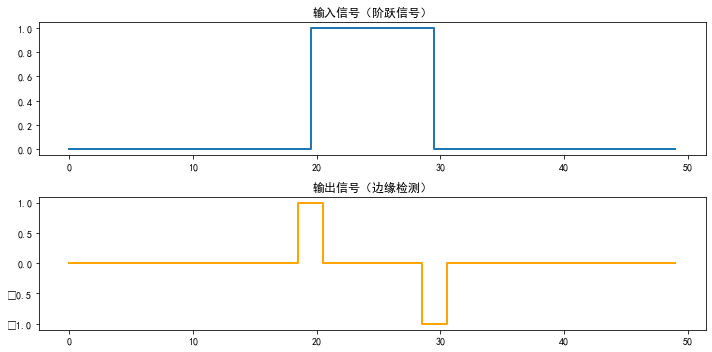

In [10]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# 创建一个输入信号（阶跃信号）
length = 50
input_signal = np.zeros(length)
input_signal[20:30] = 1  # 在20到30位置有一个高值区域

# 定义卷积核（边缘检测）
kernel = np.array([-1, 0, 1])  # 检测信号的变化

# 应用卷积
output_signal = conv_1d_padstr(input_signal, kernel, stride=1, padding=1)

# 绘制输入和输出信号
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(input_signal, label="Input Signal", drawstyle='steps-mid', linewidth=2)
plt.title("输入信号（阶跃信号）")
# plt.legend()

plt.subplot(2, 1, 2)
plt.plot(output_signal, label="Output Signal (After 1D Convolution)", color="orange", drawstyle='steps-mid', linewidth=2)
plt.title("输出信号（边缘检测）")
# plt.legend()
plt.tight_layout()
# plt.show()

<a name='2.4'></a>
### 2.4 - 2D Convolution

2D convolution is the most commonly used convolution operation in convolutional neural networks. The convolution kernel for 2D convolution is a matrix and similar to 1D convolution, the convolution kernel slides over the input image from left to right and top to bottom. As the convolution kernel slides over the image, it multiplies elements with localised regions in the image and then adds the results of all the products to produce a new pixel value. 

This process is repeated at every position in the image, eventually producing a new image called a **feature map**.

We usually use a square convolution kernel $W=(w_{kl})$ of size $f \times f$ to perform a convolution operation on an ‘image’ $X=(x_{ij})$ of size $d_H \times d_W$ to obtain an ‘image’ $Z=(z_{ij})$ of size $(d_h - f +1) \times (d_W - f + 1)$. 

The formula for the convolution operation is as follows:

>Strictly speaking, the convolution operation here is a Cross-Correlation operation, not a Convolution operation. However, in deep learning, we usually refer to cross-correlation operations as convolution operations.

$$
z_{ij} = \sum_{k=1}^f \sum_{l=1}^f x_{i+k-1,j+l-1} w_{kl}.
$$

Express it in matrix form as follows:

$$
Z = X * W.
$$

Where * denotes the convolution operation. Similar to 1D convolution, we can control the size of the output image through padding and step size.

In the following cell, you should implement the 2D convolution with padding and stride by filling in the blank code.

In [11]:
def conv2d(input_signal, kernel, padding=0, stride=1):
    """
    Simple 2D convolution with padding and stride.
    
    Parameters:
    input_signal (numpy.ndarray): Input signal (2D numpy array)
    kernel (numpy.ndarray): Convolution kernel (2D numpy array)
    padding (int): Number of zeros to pad on each side of the input signal
    stride (int): Stride (step size) for the convolution operation
    
    Returns:
    numpy.ndarray: Convolution result (2D numpy array)
    """
    # Step 1. Obtain the shape of input signal and kernel
    # Step 2. Apply padding to the input signal
    # Step 3. Calculate the output shape
    # Step 4. Initialize the output signal
    # Step 5. Perform convolution calculation by looping through each position with the given stride
    #         For each position (i, j), calculate the sum of products between the kernel and the corresponding part of the input signal

    ### YOUR CODE BEGINS HERE (approximately 12 lines)
    input_rows, input_cols = input_signal.shape
    kernel_rows, kernel_cols = kernel.shape
    input_signal_padded = np.pad(input_signal, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
    output_rows = (input_rows + 2 * padding - kernel_rows) // stride + 1
    output_cols = (input_cols + 2 * padding - kernel_cols) // stride + 1
    output_signal = np.zeros((output_rows, output_cols))

    for i in range(output_rows):
        for j in range(output_cols):
            start_row = i * stride
            end_row = start_row + kernel_rows
            start_col = j * stride
            end_col = start_col + kernel_cols
            output_signal[i, j] = np.sum(input_signal_padded[start_row:end_row, start_col:end_col] * kernel)
    ### YOUR CODE ENDS
    output_signal = output_signal.astype(int)  # Convert to integer type

    return output_signal

In [12]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Example: Using the example from the slides with stride=2
input_signal = np.array([[3, 6, 5, 4, 8],
                         [9, 1, 7, 9, 6],
                         [8, 0, 5, 0, 9],
                         [6, 2, 0, 5, 2],
                         [6, 3, 7, 0, 9]])
kernel = np.array([[-1, 1],
                   [-1, 1]])
padding = 1
stride = 2

# Perform convolution operation
output_signal = conv2d(input_signal, kernel, padding, stride)

# Print the results
print("Input signal:")
print(input_signal)
print("Kernel:")
print(kernel)
print("Padding:", padding)
print("Stride:", stride)
print("Output signal:")
print(output_signal)
print('Your result should be:\nOutput signal:\n[[ 3 -1  4]\n [17 11  6]\n[12  2  6]]')

Input signal:
[[3 6 5 4 8]
 [9 1 7 9 6]
 [8 0 5 0 9]
 [6 2 0 5 2]
 [6 3 7 0 9]]
Kernel:
[[-1  1]
 [-1  1]]
Padding: 1
Stride: 2
Output signal:
[[ 3 -1  4]
 [17 11  6]
 [12  2  6]]
Your result should be:
Output signal:
[[ 3 -1  4]
 [17 11  6]
[12  2  6]]


Different parameters of the convolution kernel lead to different convolution operations and hence extraction of different features. For example, a average convolution kernel is used to smooth an image. 

The exact effect can be seen in the context of the slides and the online material for this course.

<a name='2.5'></a>
### 2.5 - Multi-Channel 2D Convolution 

 In the above, we covered 2D convolution for images, but in reality, images often contain multiple channels. For example, a colour image contains three channels of RGB, each of which is a separate 2D image.
 
We remember that the input image's first $c$th channel corresponds to the matrix $X_c$, the $c$th channel corresponding to the convolution kernel is $W_c$. Then, the formula for multi-channel convolution is as follows:

$$
Z = \sum_{c=1}^C X_c * W_c
$$

where $C$ is the number of channels. It should be noted that in multi-channel convolution operations, the input image and the convolution should have the same number of channels.


Output size calculation
- Input size: $d_H \times d_W \times d_c$
- Kernel size: $f \times f \times d_c$
- Padding: $p$
- Stride: $s$
- Output size: $d_H' \times d_W'$

$$
d_H' = \left\lfloor \frac{d_H + 2p - f}{s} + 1 \right\rfloor \quad
d_W' = \left\lfloor \frac{d_W + 2p - f}{s} + 1 \right\rfloor
$$

In [13]:
def simple_conv2d_multichannel(input_signal, kernel, padding=0, stride=1):
    """
    Simple multi-channel 2D convolution with padding and stride.
    
    Parameters:
    input_signal (numpy.ndarray): Input signal (3D numpy array) with shape (channels, height, width)
    kernel (numpy.ndarray): Convolution kernel (3D numpy array) with shape (kernel_height, kernel_width, channels)
    padding (int): Number of zeros to pad on each side of the input signal
    stride (int): Stride (step size) for the convolution operation
    
    Returns:
    numpy.ndarray: Convolution result (2D numpy array)
    """
    # Step 1. Obtain the shape of input signal and kernel
    # Step 2. Apply padding to the input signal for each channel
    # Step 3. Calculate the output shape
    # Step 4. Initialize the output signal
    # Step 5. Perform convolution calculation by looping through each position with the given stride
    #         For each position (i, j), calculate the sum of products between the kernel and the corresponding part of the input signal across all channels

    ### YOUR CODE BEGINS HERE (approximately 15 lines)
    channels, input_rows, input_cols = input_signal.shape
    kernel_rows, kernel_cols, kernel_channels = kernel.shape
    if kernel_channels != channels:
        raise ValueError("Number of channels in input signal and kernel must match.")
    
    input_signal_padded = np.pad(input_signal, ((0, 0), (padding, padding), (padding, padding)), mode='constant', constant_values=0)
    output_rows = (input_rows + 2 * padding - kernel_rows) // stride + 1
    output_cols = (input_cols + 2 * padding - kernel_cols) // stride + 1
    output_signal = np.zeros((output_rows, output_cols))

    for i in range(output_rows):
        for j in range(output_cols):
            start_row = i * stride
            end_row = start_row + kernel_rows
            start_col = j * stride
            end_col = start_col + kernel_cols
            for c in range(channels):
                output_signal[i, j] += np.sum(input_signal_padded[c, start_row:end_row, start_col:end_col] * kernel[:, :, c])
    ### YOUR CODE ENDS
    output_signal = output_signal.astype(int)  # Convert to integer type


    return output_signal

In [14]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Example: Using a multi-channel input signal and kernel
# Input signal shape: (channels, height, width)
input_signal = np.array([
    [[3, 6, 5, 4, 8],
     [9, 1, 7, 9, 10],
     [10, 8, 2, 3, 6],
     [5, 4, 8, 9, 1],
     [7, 9, 10, 10, 7]],
    
    [[1, 2, 3, 4, 5],
     [6, 7, 8, 9, 10],
     [11, 12, 13, 14, 15],
     [16, 17, 18, 19, 20],
     [21, 22, 23, 24, 25]]
])

# Kernel shape: (kernel_height, kernel_width, channels)
kernel = np.array([
    [[1, 0],
     [0, -1]],
    
    [[-1, 0],
     [0, 1]]
])

padding = 0
stride = 1

# Perform convolution operation
output_signal = simple_conv2d_multichannel(input_signal, kernel, padding, stride)

# Print the results
print("Input signal shape:", input_signal.shape)
print("Kernel shape:", kernel.shape)
print("Padding:", padding)
print("Stride:", stride)
print("Output signal:")
print(output_signal)
print('Your result should be:\nOutput signal:\n[[-1 10  3  0]\n[ 4 -2 10 11]\n [10  9 -1 -1]\n [ 3  0  3  4]]')

Input signal shape: (2, 5, 5)
Kernel shape: (2, 2, 2)
Padding: 0
Stride: 1
Output signal:
[[-1 10  3  0]
 [ 4 -2 10 11]
 [10  9 -1 -1]
 [ 3  0  3  4]]
Your result should be:
Output signal:
[[-1 10  3  0]
[ 4 -2 10 11]
 [10  9 -1 -1]
 [ 3  0  3  4]]


<a name='2.6'></a>
### 2.6 - Play by yourself！

Note that multi-channel convolution and 3D convolution (3D Convolution) are different concepts.

- In 3D Convolution, the convolution kernel not only slides over the width and height of the data, but also moves in the depth (or time) dimension. This means that the convolution kernel itself is also three-dimensional and it captures the features of the data in all three dimensions. 
- In multi-channel convolution, each channel has its own convolution kernel, which can be the same or different. The convolution operation is performed independently on each channel and then the results from all channels are summed to produce a single output feature map.

3D convolution is a convolution performed in three spatial (or temporal) dimensions, whereas multi-channel convolution is a two-dimensional convolution performed on multiple feature channels.

Think about how it should work if you want to implement 3D convolution.